# Data Description

 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

# Import Required Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing dataset from github

df=pd.read_csv('https://github.com/dsrscientist/dataset1/raw/master/titanic_train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df=df[['PassengerId','Pclass','Name','Sex', 'Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked','Survived']]
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


We have re arraged the dataframe becasue Survived is the target column. Hence we moved to last for better understanding.

In [5]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Survived         int64
dtype: object

We have a 12 columns out of that we have a 5 columns("Name","Sex","Ticket","Cabin","Embarked") in object type - We will label encoded with in futher steps 

In [6]:
df.shape

(891, 12)

We have a 891 rows and 12 column in the dataset.

In [7]:
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived         0
dtype: int64

Based on the above info - We have a three columns in null value but already data contain "Nan" instead of space.
1) We can fill the "NaN" value with mean for "Age" column because it is continuos.
2) Rest of the two column contain string datas. 
So, we can fill the details as NCD(No Cabin Details) for Cabin column.
Then fill the details as ND(No Details) for Embarked Column.

# Treatment for Missing Data

In [8]:
df["Age"]=df["Age"].fillna(np.mean(df["Age"]))
df["Cabin"].fillna("NCD", inplace = True)
df["Embarked"].fillna("ND", inplace = True)

In [9]:
df.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Survived       0
dtype: int64

We don't have a null value in the dataset but will ensure with heatmap in next step

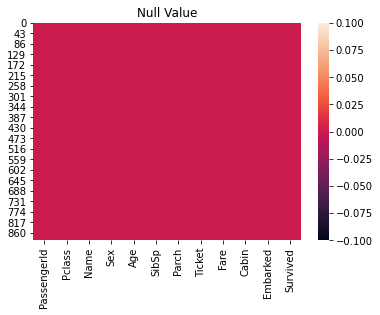

In [10]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

LE=LabelEncoder()
df["Name"]=LE.fit_transform(df["Name"])
df["Sex"]=LE.fit_transform(df["Sex"])
df["Embarked"]=LE.fit_transform(df["Embarked"])
df["Ticket"]=LE.fit_transform(df["Ticket"])
df["Cabin"]=LE.fit_transform(df["Cabin"])
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,3,108,1,22.0,1,0,523,7.2500,146,3,0
1,2,1,190,0,38.0,1,0,596,71.2833,81,0,1
2,3,3,353,0,26.0,0,0,669,7.9250,146,3,1
3,4,1,272,0,35.0,1,0,49,53.1000,55,3,1
4,5,3,15,1,35.0,0,0,472,8.0500,146,3,0


We are not changing all the columns for label encoder becasue we have only five column as label encoder hence we did only for that five columns.

# Describe Dataset

In [12]:
#Statistical Summary
df.describe()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,445.000000,0.647587,29.699118,0.523008,0.381594,338.528620,32.204208,129.974186,2.343434,0.383838
std,257.353842,0.836071,257.353842,0.477990,13.002015,1.102743,0.806057,200.850657,49.693429,35.677211,1.167398,0.486592
min,1.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,222.500000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,146.000000,2.000000,0.000000
50%,446.000000,3.000000,445.000000,1.000000,29.699118,0.000000,0.000000,337.000000,14.454200,146.000000,3.000000,0.000000
75%,668.500000,3.000000,667.500000,1.000000,35.000000,1.000000,0.000000,519.500000,31.000000,146.000000,3.000000,1.000000
max,891.000000,3.000000,890.000000,1.000000,80.000000,8.000000,6.000000,680.000000,512.329200,147.000000,3.000000,1.000000


We have a outlier and skewness. So we will check in further step

# Correlation

In [13]:
df.corr()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,1.000000,-0.035144,-0.038559,0.042939,0.033207,-0.057527,-0.001652,-0.056554,0.012658,-0.035197,0.009305,-0.005007
Pclass,-0.035144,1.000000,0.052831,0.131900,-0.331339,0.083081,0.018443,0.319869,-0.549500,0.682176,0.197493,-0.338481
Name,-0.038559,0.052831,1.000000,0.020314,0.057466,-0.017230,-0.049105,0.047348,-0.049173,0.062119,-0.006474,-0.057343
Sex,0.042939,0.131900,0.020314,1.000000,0.084153,-0.114631,-0.245489,0.059372,-0.182333,0.095991,0.106395,-0.543351
Age,0.033207,-0.331339,0.057466,0.084153,1.000000,-0.232625,-0.179191,-0.068848,0.091566,-0.234912,-0.034883,-0.069809
SibSp,-0.057527,0.083081,-0.017230,-0.114631,-0.232625,1.000000,0.414838,0.079461,0.159651,0.043525,0.068043,-0.035322
Parch,-0.001652,0.018443,-0.049105,-0.245489,-0.179191,0.414838,1.000000,0.020003,0.216225,-0.028179,0.032517,0.081629
Ticket,-0.056554,0.319869,0.047348,0.059372,-0.068848,0.079461,0.020003,1.000000,-0.013885,0.243082,0.011871,-0.164549
Fare,0.012658,-0.549500,-0.049173,-0.182333,0.091566,0.159651,0.216225,-0.013885,1.000000,-0.502569,-0.246359,0.257307
Cabin,-0.035197,0.682176,0.062119,0.095991,-0.234912,0.043525,-0.028179,0.243082,-0.502569,1.000000,0.232192,-0.253658


Correlation using heatmap

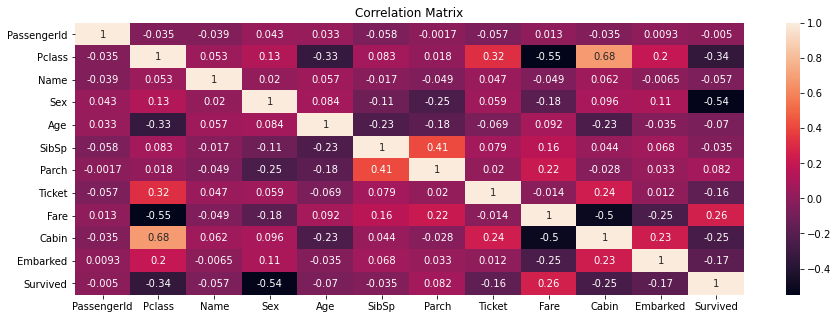

In [14]:
corr_mat=df.corr()

plt.figure(figsize=[15,5])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outcome of Correlation

We can see the positive and negative correlation with the target column. Here, we have only 2 positive correlation column out of 12 column.

# Outlier Checking 

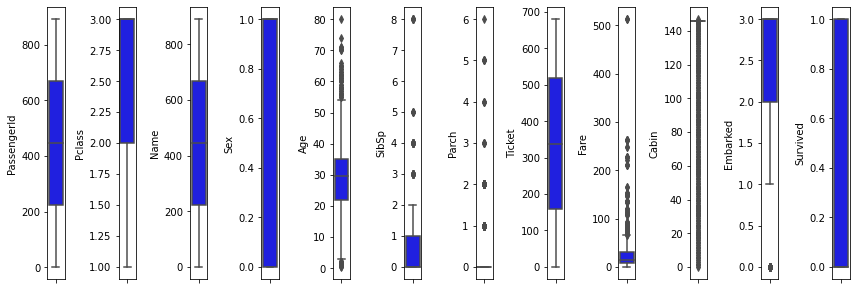

In [15]:
collist=df.columns.values
ncol=12
nrow=6
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='blue',orient='v')
    plt.tight_layout()

In the above - we have a more outlier in all the columns. we will rectify in further step

# Checking Skewness

In [16]:
df.skew()

PassengerId    0.000000
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin         -2.178951
Embarked      -1.406992
Survived       0.478523
dtype: float64

From the above info - we can see the skewness in the dataset. But we need to skip the columns which we have encoded as int.

Also, We can consider the -/+.6 is standard

# Data Cleaning

# Removing Outlier

In [17]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(891, 12)

In [18]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  23,  25,  27,  50,  54,  59,  61,  68,  71,  86,  88,
        96,  96, 116, 118, 119, 159, 164, 167, 170, 171, 174, 180, 182,
       185, 201, 209, 233, 258, 261, 266, 278, 284, 299, 311, 324, 329,
       341, 360, 377, 380, 386, 437, 438, 438, 445, 475, 480, 493, 523,
       527, 540, 541, 542, 556, 557, 567, 583, 599, 610, 630, 630, 638,
       647, 672, 678, 679, 683, 686, 689, 690, 700, 716, 730, 736, 737,
       737, 742, 745, 745, 774, 779, 779, 781, 787, 792, 806, 813, 815,
       824, 829, 846, 850, 851, 858, 863, 867, 885], dtype=int64), array([6, 5, 9, 6, 8, 5, 9, 5, 9, 5, 5, 6, 8, 4, 9, 4, 8, 5, 5, 5, 6, 9,
       5, 9, 5, 5, 9, 5, 9, 5, 8, 5, 5, 5, 9, 8, 8, 5, 9, 8, 6, 8, 8, 5,
       6, 6, 8, 9, 9, 5, 4, 9, 8, 9, 5, 5, 9, 8, 6, 9, 9, 6, 4, 9, 6, 9,
       4, 6, 8, 5, 5, 8, 9, 8, 8, 8, 6, 8, 9, 8, 4, 9, 6, 8, 9, 9, 5, 5,
       9, 5, 9, 5, 9, 5, 5, 4, 6, 5, 9, 6], dtype=int64))


In [19]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(891, 12)
(797, 12)


In [20]:
Loss_percentage=(1599-1468)/1599*100
print(Loss_percentage)

8.19262038774234


In [21]:
X=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

# Data Transform for Remove Skewness

In [22]:
from sklearn.preprocessing import power_transform
DF=power_transform(X,method='yeo-johnson')
DF

array([[-2.15959089,  0.85058628, -1.39839936, ..., -0.82641893,
         0.47067642,  0.58969266],
       [-2.14351198, -1.51681906, -0.98186734, ...,  1.58933784,
        -2.33145743, -1.92378595],
       [-2.12891051,  0.85058628, -0.27991273, ..., -0.73109948,
         0.47067642,  0.58969266],
       ...,
       [ 1.570798  ,  0.85058628, -0.04623319, ...,  0.43702004,
         0.47067642,  0.58969266],
       [ 1.57384175, -1.51681906, -1.55338178, ...,  0.6982565 ,
        -2.36331608, -1.92378595],
       [ 1.57688453,  0.85058628, -0.84293692, ..., -0.75504286,
         0.47067642, -0.93205566]])

In [23]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(DF)
x

array([[-2.15959089,  0.85058628, -1.39839936, ..., -0.82641893,
         0.47067642,  0.58969266],
       [-2.14351198, -1.51681906, -0.98186734, ...,  1.58933784,
        -2.33145743, -1.92378595],
       [-2.12891051,  0.85058628, -0.27991273, ..., -0.73109948,
         0.47067642,  0.58969266],
       ...,
       [ 1.570798  ,  0.85058628, -0.04623319, ...,  0.43702004,
         0.47067642,  0.58969266],
       [ 1.57384175, -1.51681906, -1.55338178, ...,  0.6982565 ,
        -2.36331608, -1.92378595],
       [ 1.57688453,  0.85058628, -0.84293692, ..., -0.75504286,
         0.47067642, -0.93205566]])

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range (0,100):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.31,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,Y_train)
    predrf=LR.predict(x_test)
    acc = accuracy_score(Y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on Random state",maxRS)

Best Accuracy is 0.842741935483871 on Random state 31


# Creating Train-Test Split

In [25]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.31,random_state=31)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

LR = LogisticRegression()
LR.fit(x_train,Y_train)
pred=LR.predict(x_test)
print (accuracy_score(Y_test, pred))
print (confusion_matrix(Y_test, pred))
print (classification_report(Y_test, pred))

0.842741935483871
[[136  13]
 [ 26  73]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87       149
           1       0.85      0.74      0.79        99

    accuracy                           0.84       248
   macro avg       0.84      0.83      0.83       248
weighted avg       0.84      0.84      0.84       248



In [27]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,Y_train)
prid=DT.predict(x_test)
print (accuracy_score(Y_test, prid))
print (confusion_matrix(Y_test, prid))
print (classification_report(Y_test, prid))

0.7540322580645161
[[120  29]
 [ 32  67]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       149
           1       0.70      0.68      0.69        99

    accuracy                           0.75       248
   macro avg       0.74      0.74      0.74       248
weighted avg       0.75      0.75      0.75       248



In [28]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,Y_train)
predi=RF.predict(x_test)
print (accuracy_score(Y_test, predi))
print (confusion_matrix(Y_test, predi))
print (classification_report(Y_test, predi))

0.8306451612903226
[[141   8]
 [ 34  65]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       149
           1       0.89      0.66      0.76        99

    accuracy                           0.83       248
   macro avg       0.85      0.80      0.81       248
weighted avg       0.84      0.83      0.82       248



In [29]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,Y_train)
prd=svc.predict(x_test)
print (accuracy_score(Y_test, prd))
print (confusion_matrix(Y_test, prd))
print (classification_report(Y_test, prd))

0.842741935483871
[[139  10]
 [ 29  70]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       149
           1       0.88      0.71      0.78        99

    accuracy                           0.84       248
   macro avg       0.85      0.82      0.83       248
weighted avg       0.85      0.84      0.84       248



We are getting the high accuracy with RandomForest is 86%. It will be cross check with CV 

In [30]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(LR,x,Y,cv=5)
scr=cross_val_score(DT,x,Y,cv=5)
sc=cross_val_score(RF,x,Y,cv=5)
scor=cross_val_score(svc,x,Y,cv=5)
print("Cross Validation Score of LR :",score.mean())
print("Cross Validation Score of DT :",scr.mean())
print("Cross Validation Score of RF :",sc.mean())
print("Cross Validation Score of svc :",scor.mean())

Cross Validation Score of LR : 0.7967138364779874
Cross Validation Score of DT : 0.7705581761006289
Cross Validation Score of RF : 0.8369811320754718
Cross Validation Score of svc : 0.8205974842767295


Minimum Difference in accuracy and cross_validation score is for Randonforest(1%). So, this is best model

# Hyper Parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': np.arange(2,15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(RF,parameters,cv=5)
GCV.fit(x_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [44]:
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8}

In [45]:
Gcv_prd=GCV.best_estimator_.predict(x_test)

accuracy_score(Y_test,Gcv_prd)

0.8346774193548387

# Model Saving

In [48]:
import pickle
filename='Titanic.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion

In [49]:
Loaded_load = pickle.load(open('Titanic.pkl','rb'))
Result=Loaded_load.score(x_test,Y_test)
print(Result)

0.8306451612903226


In [54]:
Conclusion=pd.DataFrame([Loaded_load.predict(x_test)[:],Gcv_prd[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,238,239,240,241,242,243,244,245,246,247
Predicted,0,0,0,1,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0
Original,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,1,0,0


We have a the outcome for this model